# Customer Segmentation Using Clustering by Sharique

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Step 2: Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3: Checking Shape

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster                 200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000,1.755000
std,57.879185,0.497633,13.969007,26.264721,25.823522,1.468249
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,1.000000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,3.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,4.000000


## Step 4: Checking for Null values

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Step 5: Plot distribution

<Axes: xlabel='Age', ylabel='Count'>

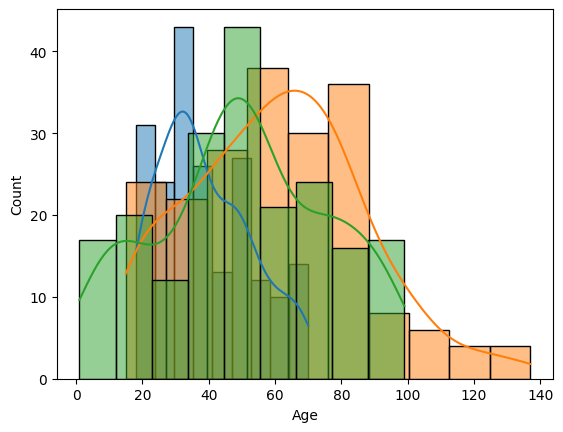

In [5]:
sns.histplot(df["Age"], kde=True)
sns.histplot(df["Annual Income (k$)"], kde=True)
sns.histplot(df["Spending Score (1-100)"], kde=True)

## Step 6: Correlation Heatwave

<Axes: >

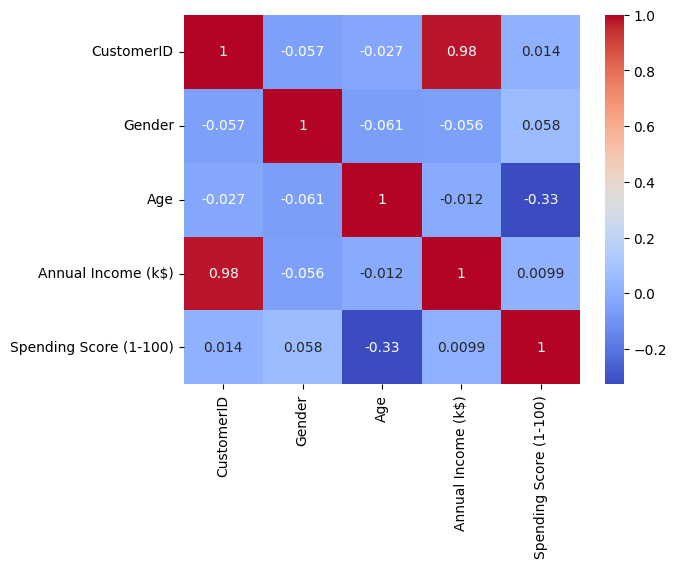

In [6]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Step 7: Feature Selection + Scaling

In [7]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 8: K-means Clustering

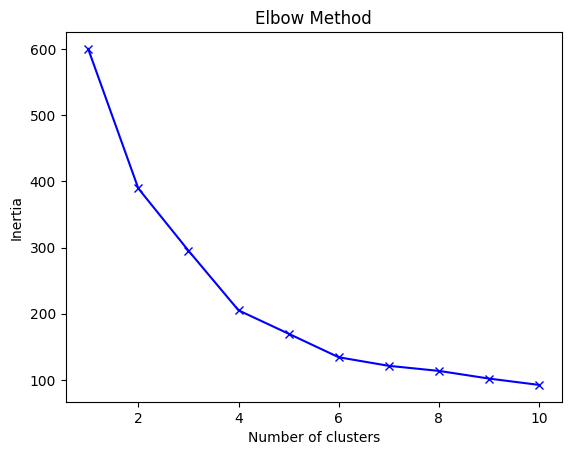

In [8]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

## Step 9: Cluster Visualization

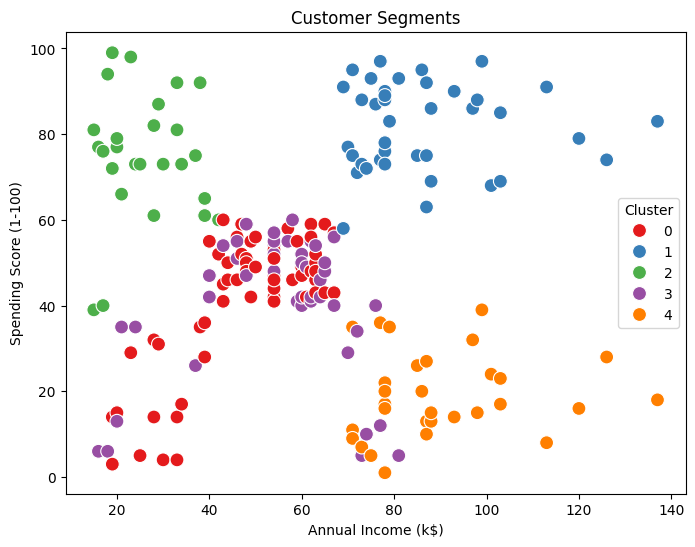

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="Set1", s=100)
plt.title("Customer Segments")
plt.show()